# Jupyter Notebook

## Assignment : In Lesson : Week 3

- Open "Week 3.ipynb"
- "Trust" it 
- Hit "Continue" in the top right)

Press "Shift + Enter" to run each block (updating anything you've edited or changed)

You will be pressing "Shift + Enter" a lot to get between each block of text and to update the code and answers 

# Week 3: Analysing data using Python

![Prefect : Cleverly simple control of energy](image.png)

## Set up

Use "Shift + Enter" to run the next 2 blocks, this will get everything we need set up.


In [1]:
try:
    import micropip
    await micropip.install(["pyoliteutils"])
except:
    pass

In [2]:
from pyoliteutils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 5)})

### Download the data

In [3]:
url="https://raw.githubusercontent.com/UTCSheffield/OCR-Unit-7-Data-analysis-and-design/main/content/Prefect_Project/prefect_data.csv"
prefect_data_file = await get_file_from_url(url)
prefect_data = pd.read_csv(prefect_data_file)

# Notice that in Jupyter just running the variable name will display it
# If the variable is a pandas dataframe it will show a truncated table
prefect_data

,Date,Name,Temp Air,Humidity,L2kWh (Meas),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,25/04/2024,Block B Flat 14 Kitchen,17.5,33,31.22,NaN,NaN,NaN,NaN
1,04/04/2024,Block C Flat 13 Kitchen,18.9,44,31.05,NaN,NaN,NaN,NaN
2,03/04/2024,Block C Flat 13 Kitchen,21.0,46,25.31,NaN,NaN,NaN,NaN
3,01/04/2024,Block B Flat 6 Kitchen,19.7,42,24.49,NaN,NaN,NaN,NaN
4,17/04/2024,Block D Flat 10-E,-20.8,75,23.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11149,03/04/2024,Block D Flat 9-F,14.8,58,0.00,NaN,NaN,NaN,NaN
11150,20/04/2024,Block D Flat 9-F,14.8,41,0.00,NaN,NaN,NaN,NaN
11151,15/04/2024,Block D Flat 9-F,14.7,48,0.00,NaN,NaN,NaN,NaN
11152,19/04/2024,Block D Flat 9-F,14.7,44,0.00,NaN,NaN,NaN,NaN


## Tidy up a bit

- Convert the Date column into a Date
- Drop the columns we don't need

In [4]:
prefect_data['Date'] = pd.to_datetime(prefect_data['Date'], format="%d/%m/%Y")
prefect_data.drop(columns=["Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"], inplace=True)
prefect_data['Day'] = prefect_data['Date'].dt.day_name()
prefect_data['Month'] = prefect_data['Date'].dt.month
prefect_data['Month Name'] = prefect_data['Date'].dt.month_name()

prefect_data

,Date,Name,Temp Air,Humidity,L2kWh (Meas),Day,Month,Month Name
0,2024-04-25,Block B Flat 14 Kitchen,17.5,33,31.22,Thursday,4,April
1,2024-04-04,Block C Flat 13 Kitchen,18.9,44,31.05,Thursday,4,April
2,2024-04-03,Block C Flat 13 Kitchen,21.0,46,25.31,Wednesday,4,April
3,2024-04-01,Block B Flat 6 Kitchen,19.7,42,24.49,Monday,4,April
4,2024-04-17,Block D Flat 10-E,-20.8,75,23.08,Wednesday,4,April
...,...,...,...,...,...,...,...,...
11149,2024-04-03,Block D Flat 9-F,14.8,58,0.00,Wednesday,4,April
11150,2024-04-20,Block D Flat 9-F,14.8,41,0.00,Saturday,4,April
11151,2024-04-15,Block D Flat 9-F,14.7,48,0.00,Monday,4,April
11152,2024-04-19,Block D Flat 9-F,14.7,44,0.00,Friday,4,April


### You can make a new dataframe by filtering 

In [5]:
date_df = prefect_data[prefect_data['Date'] =="2024-04-03"]
date_df 

,Date,Name,Temp Air,Humidity,L2kWh (Meas),Day,Month,Month Name
2,2024-04-03,Block C Flat 13 Kitchen,21.0,46,25.31,Wednesday,4,April
10,2024-04-03,Block D Flat 2 Kitchen,21.1,46,20.49,Wednesday,4,April
11,2024-04-03,Block A Flat 6 Kitchen,21.3,41,20.39,Wednesday,4,April
16,2024-04-03,Block C Flat 14 Kitchen,21.2,44,18.19,Wednesday,4,April
24,2024-04-03,Block C Flat 9 Kitchen,21.1,46,14.58,Wednesday,4,April
...,...,...,...,...,...,...,...,...
11002,2024-04-03,Block D Flat 8-D,16.5,56,0.00,Wednesday,4,April
11042,2024-04-03,Block D Flat 9 Kitchen,15.1,67,0.00,Wednesday,4,April
11069,2024-04-03,Block D Flat 9-A,14.9,59,0.00,Wednesday,4,April
11132,2024-04-03,Block D Flat 9-E,15.8,58,0.00,Wednesday,4,April


## Temperature Data

We can use Seaborn (sns) to draw a graph of a dataframe (prefect_data). 

As there are lots of measurements for each date we get a shaded band. 

<Axes: xlabel='Date', ylabel='Temp Air'>

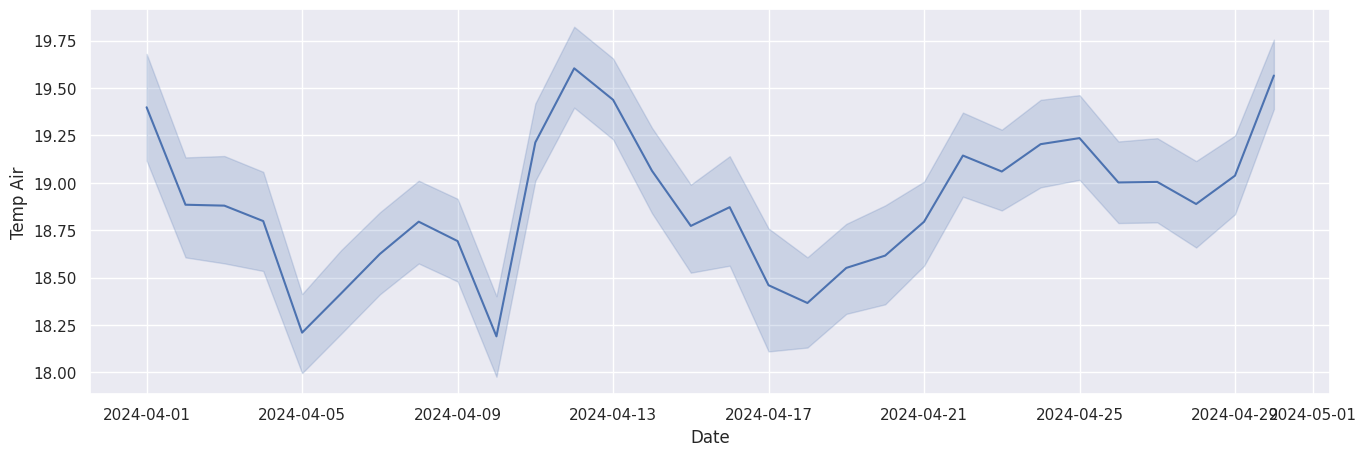

In [6]:
graph = sns.lineplot(data=prefect_data, x="Date", y="Temp Air")
graph

### Task 1: 

Create a line graph showing the temperature data of a single room. 

Under your graph, write a short summary of what you can see.

In [7]:
# What is the column name of the column with the room names?
# Pick a room
prefect_data

,Date,Name,Temp Air,Humidity,L2kWh (Meas),Day,Month,Month Name
0,2024-04-25,Block B Flat 14 Kitchen,17.5,33,31.22,Thursday,4,April
1,2024-04-04,Block C Flat 13 Kitchen,18.9,44,31.05,Thursday,4,April
2,2024-04-03,Block C Flat 13 Kitchen,21.0,46,25.31,Wednesday,4,April
3,2024-04-01,Block B Flat 6 Kitchen,19.7,42,24.49,Monday,4,April
4,2024-04-17,Block D Flat 10-E,-20.8,75,23.08,Wednesday,4,April
...,...,...,...,...,...,...,...,...
11149,2024-04-03,Block D Flat 9-F,14.8,58,0.00,Wednesday,4,April
11150,2024-04-20,Block D Flat 9-F,14.8,41,0.00,Saturday,4,April
11151,2024-04-15,Block D Flat 9-F,14.7,48,0.00,Monday,4,April
11152,2024-04-19,Block D Flat 9-F,14.7,44,0.00,Friday,4,April


In [8]:
# Using the Column name you found, Create a datafrane for the room you picked
room_df = prefect_data[prefect_data['Column Name'] == "Value"]
room_df 

KeyError: 'Column Name'

In [9]:
# Print the first 6 measurements in the room
room_df.head(6)

NameError: name 'room_df' is not defined

<Axes: xlabel='Date', ylabel='Temp Air'>

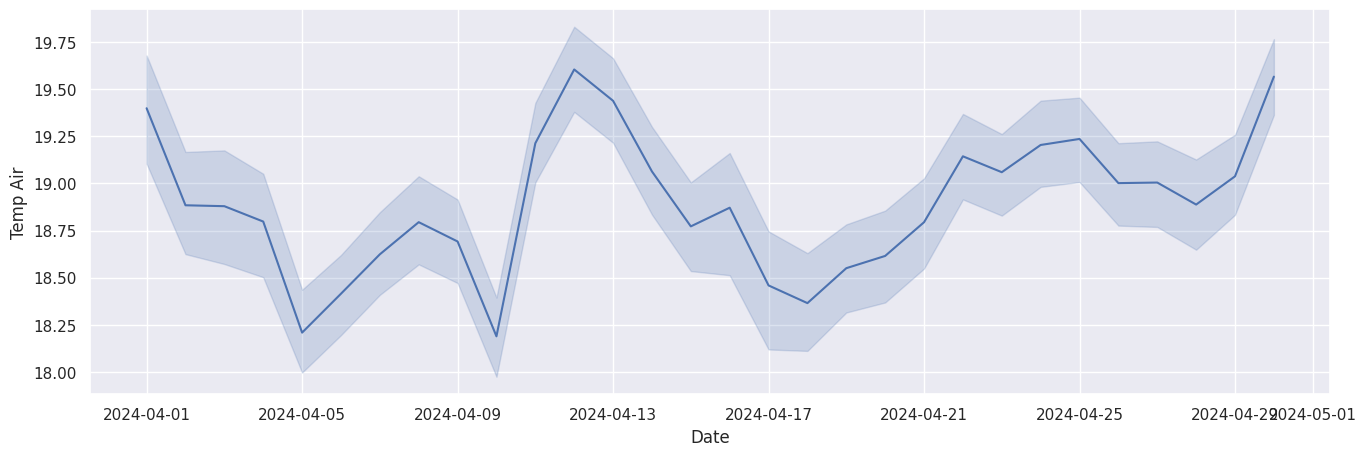

In [10]:
# Change this to use the room_df 
graph = sns.lineplot(data=prefect_data, x="Date", y="Temp Air")
graph

#### A short summary of what you can see.

Doudble click here and write what you can see.

### Task 2: 

Using a descending sort on the "Temp Air" column, find which room was the hottest during April? 

In [15]:
# Filter so we only have  the measurements where the "Month Name" of April
april_df = prefect_data[prefect_data['Column Name'] == "Value"]

# Using a descending sort on the "Temp Air" column
sorted_df = april_df.sort_values(by="Humidity", axis=0, ascending=True)
sorted_df.head(5)

KeyError: 'Column Name'

#### Which room was the hottest during April? 

Answer here (double click here)

### Other techniques 

In [18]:
april_df[april_df["Temp Air"]==april_df["Temp Air"].max()]

,Date,Name,Temp Air,Humidity,L2kWh (Meas),Day,Month,Month Name
6765,2024-04-17,Block A Flat 5-E,29.8,44,0.0,Wednesday,4,April


### Task 3: 

Using an ascending sort on the "Temp Air" column, find the rooms with the lowest temperature readings. 

In [19]:
# Using a ascending sort on the "Temp Air" column
sorted_df = april_df.sort_values(by="Humidity", axis=0, ascending=True)
sorted_df.head(5)

,Date,Name,Temp Air,Humidity,L2kWh (Meas),Day,Month,Month Name
8561,2024-04-26,Block C Flat 10-C,26.5,22,0.0,Friday,4,April
8554,2024-04-27,Block C Flat 10-C,27.3,24,0.0,Saturday,4,April
9044,2024-04-20,Block C Flat 1-B,27.8,25,0.0,Saturday,4,April
8545,2024-04-15,Block C Flat 10-C,28.7,25,0.0,Monday,4,April
9055,2024-04-25,Block C Flat 1-B,26.1,25,0.0,Thursday,4,April



#### Why do you think such low temperatures have been recorded?

Answer here



## Humidity data

### Task 1: 

Create a line graph showing how the humidity of a room has changed throughout April.

In [20]:
# Copy code from above to get you started with this task 


#### Write a short summary of what you can see.​



### Task 2: 

Room humidity should be between 60 and 70%. ​
Find all the rooms that have a humidity higher than 70%. ​

In [23]:
# this finds and displays rooms that are under 0 degrees 
cold_df = prefect_data[prefect_data['Temp Air'] < 0]
cold_df 

,Date,Name,Temp Air,Humidity,L2kWh (Meas),Day,Month,Month Name
4,2024-04-17,Block D Flat 10-E,-20.8,75,23.08,Wednesday,4,April
21,2024-04-16,Block D Flat 10-E,-20.8,75,15.46,Tuesday,4,April


In [ ]:
# convert this to make and display humid_df where Humidity is over 70%
cold_df = prefect_data[prefect_data['Temp Air'] < 0]
cold_df

#### How many are there?​
?

### Task 3: 

If a room has humidity above 70%, it suggests there is a leak in the room. Write a short email to the maintenance team asking them to investigate.

Email body here

## Energy data (energy used by the room's heater)​

The field name for the energy used is "L2kWh (Meas)"

In [27]:
by_day = prefect_data.groupby('Day')
by_day_aggregated = by_day.agg(
    mean_temp = pd.NamedAgg(column='Temp Air', aggfunc="mean"),
)
by_day_aggregated

,mean_temp
Day,
Friday,18.841560
Monday,19.029263
Saturday,18.868527
Sunday,18.842502
Thursday,18.903362
Tuesday,19.014570
Wednesday,18.683120


### Task 1: 

Add up the total energy used by each room.​

In [31]:
by_room = prefect_data.groupby('??')
by_room_aggregated = by_room.agg(
    total_energy = pd.NamedAgg(column='??', aggfunc="sum"),
)
by_room_aggregated

KeyError: '??'

### Task 2: 

Find the 20 rooms that used the most energy.


In [32]:
# This is my first guess at the code
by_room_sorted_df = by_room_aggregated.sort_values(by="??", axis=0, ascending=True)
by_room_sorted_df.head(5)

KeyError: '??'

### Task 3

Students in these rooms could have added their own heater which is a fire risk.

What action(s) would you recommend the building owner takes to stop this? ​

Write your recommendations here

## Seaborn is very cool

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


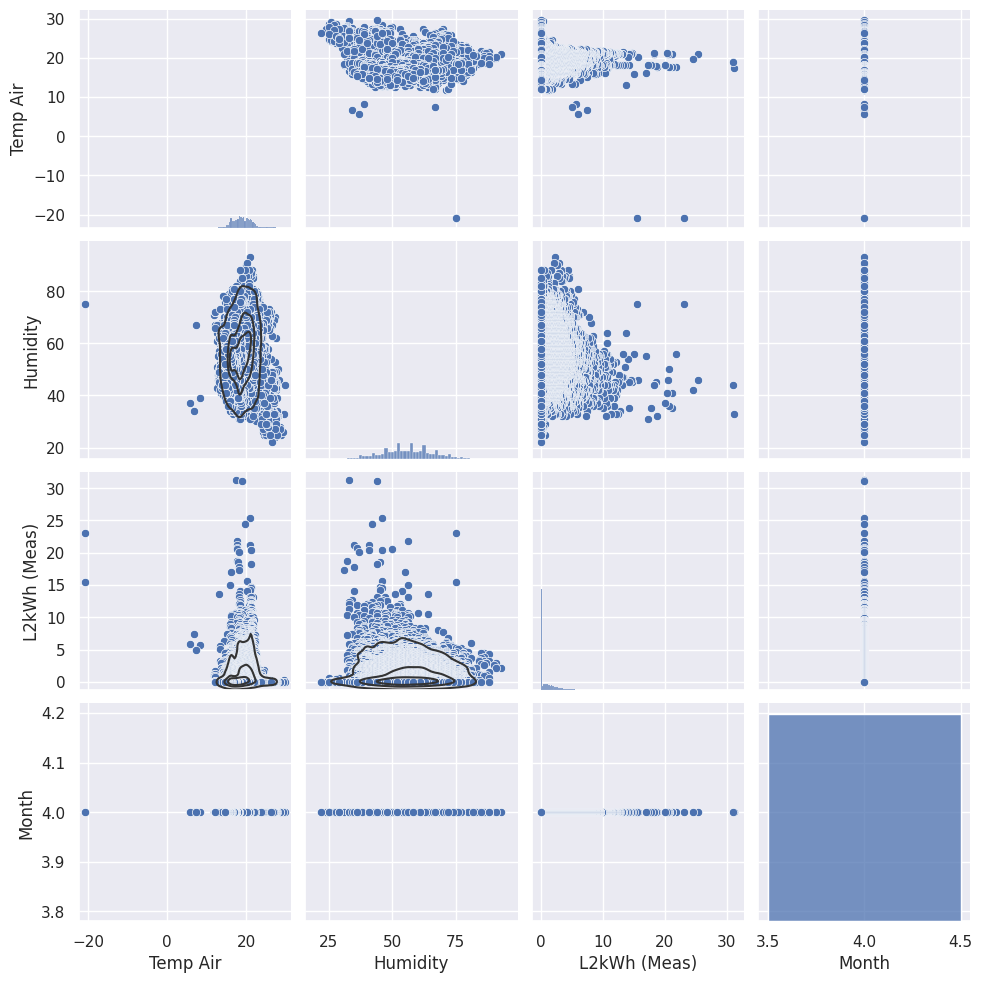

In [33]:
g = sns.pairplot(prefect_data)
g.map_lower(sns.kdeplot, levels=4, color=".2")
g

#### Can you see any patterns in this graph?


## Save and turn in